In [121]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pyshtools as pysh
import SLmod_real as SL
from numpy import pi as pi

#set plotting parameters
plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18) 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [16, 8]

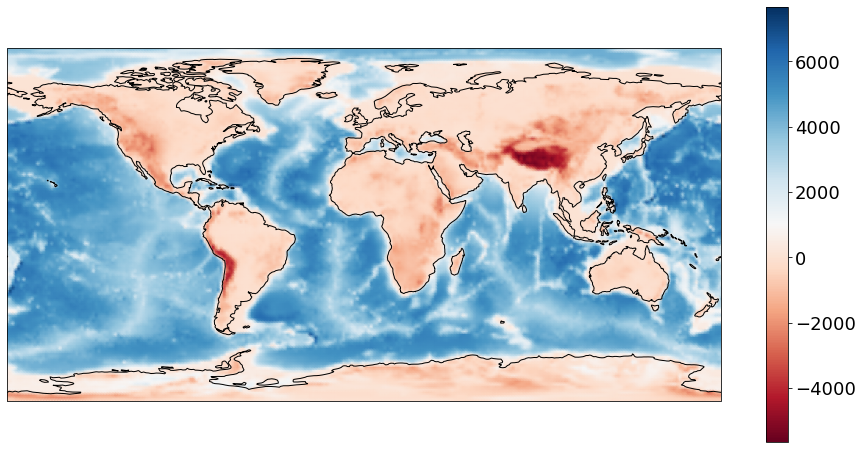

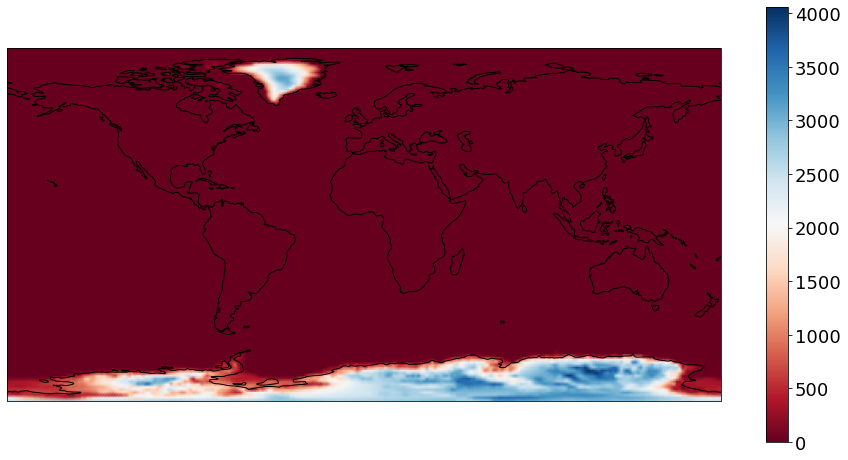

In [123]:
L=128
sl0,ice0 = SL.get_sl_ice_data(L)
SL.geo_plot(sl0)
SL.geo_plot(ice0)

In [124]:
C = SL.ocean_function(sl0,ice0)
A = SL.surface_integral(C)
A_earth = 4*pi*SL.b**2
print('fraction of surface which is ocean = ',A/A_earth)

fraction of surface which is ocean =  0.7127544795523005


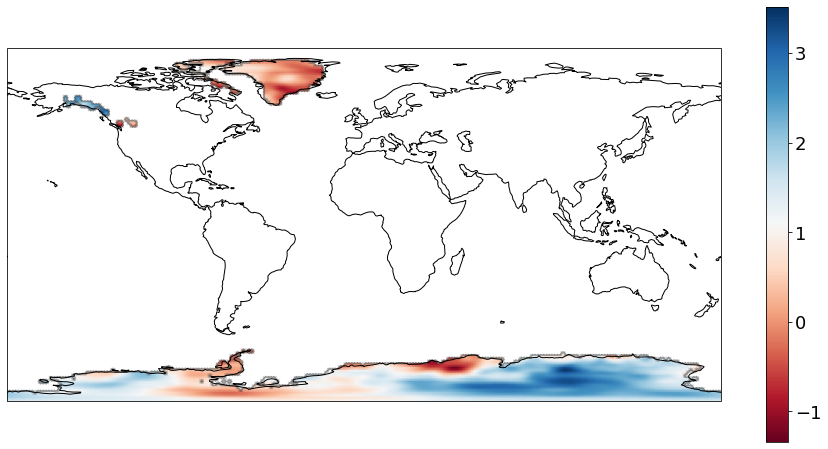

In [128]:
# set covariance for a random field
Q = SL.laplace_covariance(L,std = 1.,s = 2,mu = 0.1) 

# build a random melt geometry
ice = SL.random_field(Q)*SL.ice_mask(sl0,ice0,0.)


# plot the result with suitable mask
ice_mask = SL.ice_mask(sl0,ice0)
SL.geo_plot(ice_mask*ice)

iteration =  1 relative change =  0.038068143829840716
iteration =  2 relative change =  0.004642302327352302
iteration =  3 relative change =  0.0007910851464254822
iteration =  4 relative change =  0.0001519857690266916
iteration =  5 relative change =  3.184080768204182e-05
iteration =  6 relative change =  7.190604295795667e-06
iteration =  7 relative change =  1.738902472071497e-06
iteration =  8 relative change =  4.4788945725082436e-07


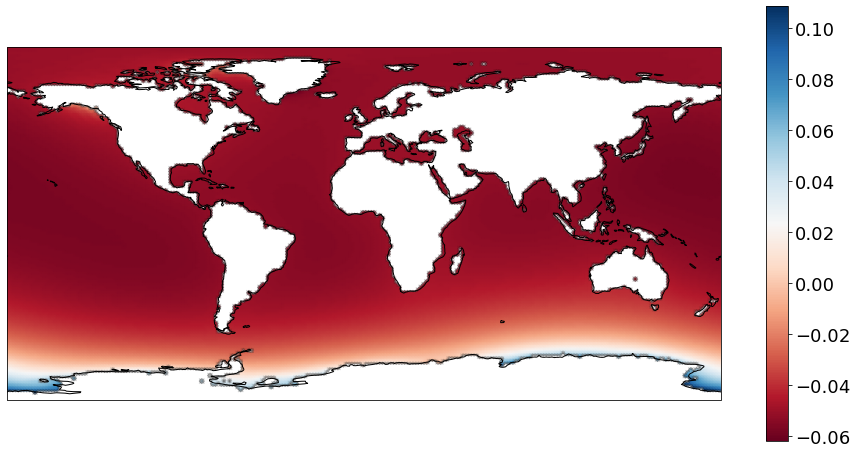

In [130]:
# set the direct load
zeta   = SL.rhoi*(1-C)*ice
# solve the fingerprint problem
sl,_,_,_,_ = SL.fingerprint(C,zeta)
ocean_mask = SL.ocean_mask(sl0,ice0)
SL.geo_plot(ocean_mask*sl)

iteration =  1 relative change =  0.023068716990521734
iteration =  2 relative change =  0.0010872707419321223
iteration =  3 relative change =  0.00014493576779501654
iteration =  4 relative change =  2.8949698839481482e-05
iteration =  5 relative change =  6.453552178885792e-06
iteration =  6 relative change =  1.5637280323795106e-06
iteration =  7 relative change =  4.4544705587712233e-07


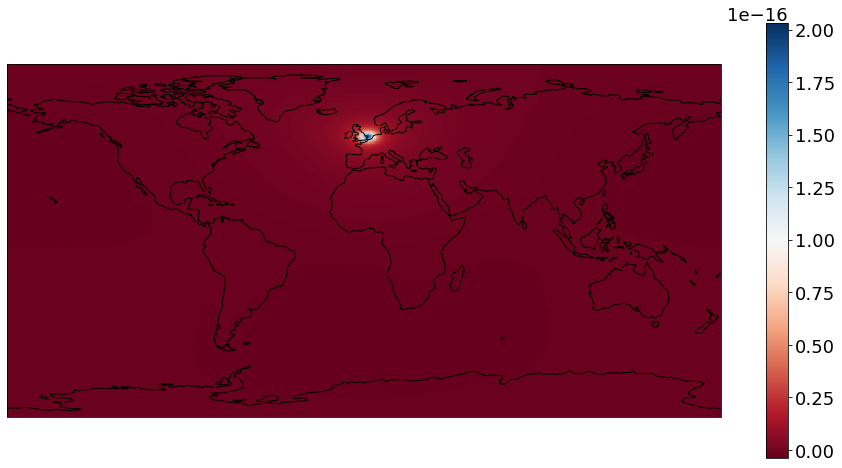

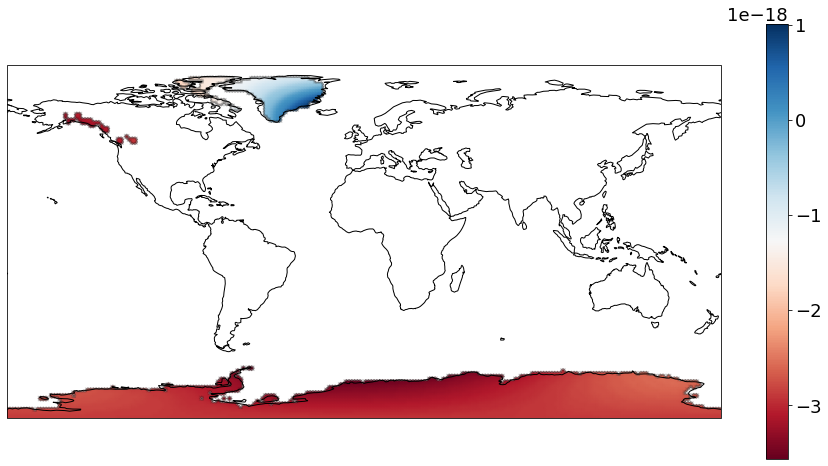

-0.05036569817405607 -0.05036572359615883 5.047503297845521e-07


In [131]:
# set the observation point and set the adjoint loads
lats = np.zeros(1)
lons = np.zeros(1)
lats[0] =  52.48
lons[0] =  1.75

zeta_d   = SL.point_load(L,lats,lons,angle = 2)

# act the adjoint load on the sea level to get the observation
J =   SL.surface_integral(zeta_d*sl) 

sl_d,_,_,_,_ = SL.fingerprint(C,zeta_d)
SL.geo_plot(sl_d)
SL.geo_plot(ice_mask*sl_d)


# act the load on the adjoint sea level
J2 =   SL.surface_integral(zeta*sl_d)          

# compare the two values
print(J,J2,np.abs(J-J2)/np.abs(J))